# Statistical Analysis with Python
As of now learned how we can organize, transform and visualize our data.<br>

<blockquote style="font-size: 20px; text-align: center;">
    <p>"Statistical Analysis is about asking and answering questions about our data."</p>
</blockquote>

<center><img src="images/statistics_overview.png" width="700" /></center>

While working with our data so far, we also asked some questions. For example, what is the `mean`, `min` or `max`.<br>
These kind of questions belong to **descriptive statistical analysis**.<br>

#### Descriptive Statistical Analysis
is about describing and summarizing our data in meaningful ways to help us to identify patterns and relationships.<br>
While the techniques that fall under descriptive statistics help us find patterns and relationships,<br>
they are **not the ones** that actually do the ***finding*** of these patterns and relationships and the ***verification*** of their significance.

#### Inferential Statistical Analysis
is where we ***find the patterns*** and relationships based on data that we sample from a population.<br>
Here we also verify that the things we found are actually significant and not just due to chance.<br>
The things we do find based on the sampled data then allow us to make inferences about the population that the sampled data came from.

### Sidenote: But what about Machine Learning?
**Machine Learning** is very closely related to **Statistical Analysis** since both revolve around analyzing and extracting knowledge from data.
There are also a lot of techniques such as linear models that we can count into both areas.<br>
The difference that the predictions and inferences we make in **Statistical Analysis**  are more formal and aim to uncover the underlying mechanisms and<br> relationships in the data and assess their statistical significance.<br>
While in **Machine Learning** we care more about the prediction accuracy and building models that can generalize well to unseen data.


## The Techniques of Inferential Statistical Analysis
The **2 central techniques** of how we make conclusions about our data (sample and population) are<br>
**Hypothesis testing** and **Statistical Modeling**.<br>
Everything we are gonna talk about in this notebook will revolve around how we can implement these techniques in python and how we can interpret the results. <br>

So what are **Hypothesis testing** and **Statistical Modeling** about?<br>

### Statistical Modeling
helps us in **2** ways to answer questions about our data.<br>
The **1st** is that we can model the underlying structure and patterns of our data. So for example we can model the relationship between two variables in our data.<br>
If we want to verify that an effect of a variable or some relations between two variables is significant, then we make use of...

### Hypothesis Testing (real or chance?)
As we can tell from the name, hypothesis testing is about testing a hypothesis. This hypothesis can either be about the relationship between variables<br>
or it can be a statement or proposition about a population parameter. So, for example, "the mean horn length of unicorns is greater than 10cm".<br>
To test our hypothesis we formulate a null hypothesis saying that there is no effect. Then we build a model based on this null hypothesis and use it to generate samples to estimate the data that we would get from a population where there is no effect. This is the **2nd** use case of statistical modeling.<br>
We then compare our data that we originally measured with this new data to check how likely it would have been to observe the data that we did if there was indeed no effect. And if that would have been very unlikely, then we can say that there probably is an effect. So the effect is probably real and its not just chance.

<br>

# Statistical Modeling

In [1]:
import numpy as np
import pandas as pd
import math
# ggplot
from plotnine import *
import seaborn as sns
import matplotlib.pyplot as plt

When we are doing statistical modeling, it usually involves the following steps
1. look at our data - can we identify any structure, pattern or regularity?
2. select a model
3. fit model on data to capture underlying structure
4. evaluate model - check significance of structure with hypothesis testing

## The Data
Because we want to check if can accurately model the underlying structure of our data, we generate that data based on a structure that we define beforehand.

In [2]:
def generate_data(intercept=1, slope=1, n_samples=100, scale=1):
    np.random.seed(0)
    x = np.linspace(0, 10, n_samples)
    noise = np.random.normal(scale=scale, size=n_samples)
    y = intercept + x * slope + noise
    data = pd.DataFrame({"x": x, "y": y})
    return data, x


intercept = 5
slope = 2
data, x = generate_data(intercept, slope)
data.head()

,x,y
0,0.00000,6.764052
1,0.10101,5.602177
2,0.20202,6.382778
3,0.30303,7.846954
4,0.40404,7.675639


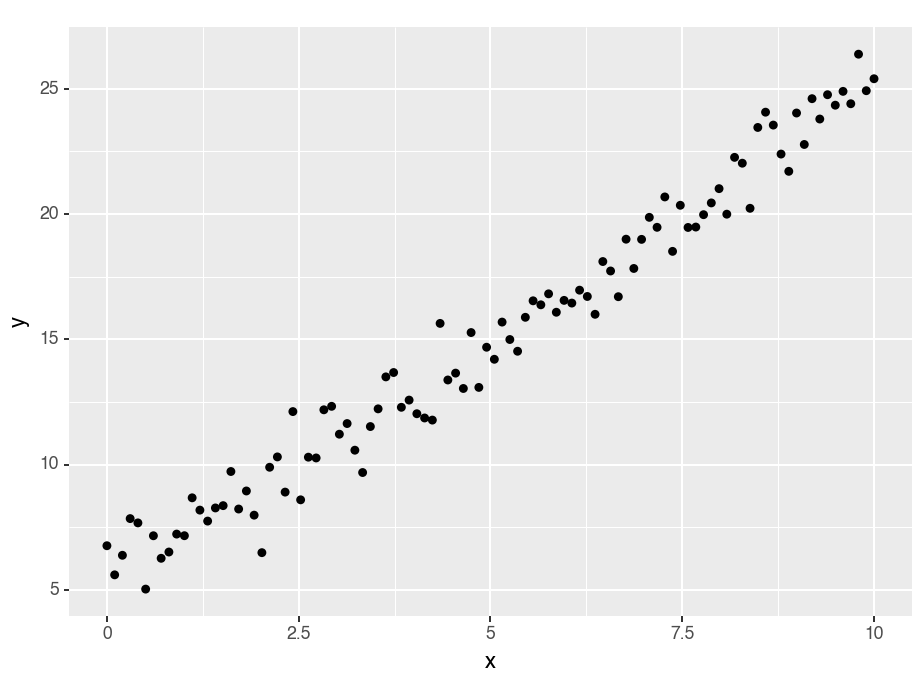

<Figure Size: (460 x 345)>

In [3]:
(ggplot(data, aes(x="x", y="y")) + geom_point())

## The Model
As you can imagine there are a lot of models that we can use to model our data.<br>
In this notebook we will look at the **linear regression model**, <br>
which we can consider as *the* fundamental model of statistical modeling due to its simple nature and because it serves as a building block for more complex models.

### Linear Regression Models

The general form of a linear regression model is 

\begin{equation}
\mathbf{y} = \mathbf{X}\mathbf{\beta} + \mathbf{\epsilon}
\end{equation}


\begin{equation}
\mathbf{y} = \beta_0 + \beta_1x_1 + \beta_2x_2 + \ldots + \beta_px_p + \mathbf{\epsilon}
\end{equation}


with $\mathbf{y}$ being the dependent or predicted variable, $\mathbf{X}$ is the design matrix containing the independent or predictor variables, $\beta$ are the parameters and $\epsilon$ are the errors.<br>
$\mathbf{X}$ is called the design matrix because it captures the design of the experiment. So what variables are measured and with how many samples.<br>
The errors are assumed to be normally distributed with a mean of zero and a constant variance. They capture the variability in the dependent variable that is not explained by the predictors.<br>

\begin{equation}
\epsilon \sim \mathcal{N}(0, \sigma^2)
\end{equation}

That means that given an $x$ we can say as much as that the $y$ value will be determined by a normal distribution centered at the predicted $\hat y$.

The difference between a **linear model** and a **linear** ***regression*** **model** is that the former is just a mathematical representation of the relationship between two variables, while the later has the goal of modeling the relationship of variables based on data that we observed.<br>
For the linear regression model we are also including the previously mentioned error term $\epsilon$ and thus acknowledge that there are factors or variables beyond our control that affect the dependent variable.<br>
For the linear model, the mathematical representation, we don't have this error term.



## Linear Regression - Fitting the Model to our Data
The process of estimating the parameters of our linear model such that they best fit our data is called **Linear Regression**.<br>
The idea behind linear regression is that we minimize the difference between the predicted values and the actual values in the training data.
[If you want some more info.](https://www.youtube.com/watch?v=7ArmBVF2dCs)<br>
We will perform linear regression by making use of the `statsmodels` package, which includes a variety of *stat models*, one of them being the linear regression model.<br>
If we later decide to choose a different, maybe more complex model, we can simple switch to that without changing any further syntax.<br>

In the `statsmodels` package, the linear regression model goes by the name of `OLS` which stands for *ordinary least squares*.

In [4]:
import statsmodels.formula.api as smf
import statsmodels.api as sm

In [5]:
fit = smf.ols("y ~ x", data).fit()
fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.970
Model:                            OLS   Adj. R-squared:                  0.970
Method:                 Least Squares   F-statistic:                     3208.
Date:                Thu, 15 Jun 2023   Prob (F-statistic):           1.09e-76
Time:                        16:08:09   Log-Likelihood:                -142.31
No. Observations:                 100   AIC:                             288.6
Df Residuals:                      98   BIC:                             293.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      5.2085      0.201     25.867      0.000       4.809       5.608
x              1.9703      0.035     56.636      0.000       1.901       2.039
==============================================================================
Omnibus:                        0.397   Durbin-Watson:                   1.841
Prob(Omnibus):                  0.820   Jarque-Bera (JB):                0.556
Skew:                          -0.036   Prob(JB):                        0.757
Kurtosis:                       2.642   Cond. No.                         11.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### plotting the regression line

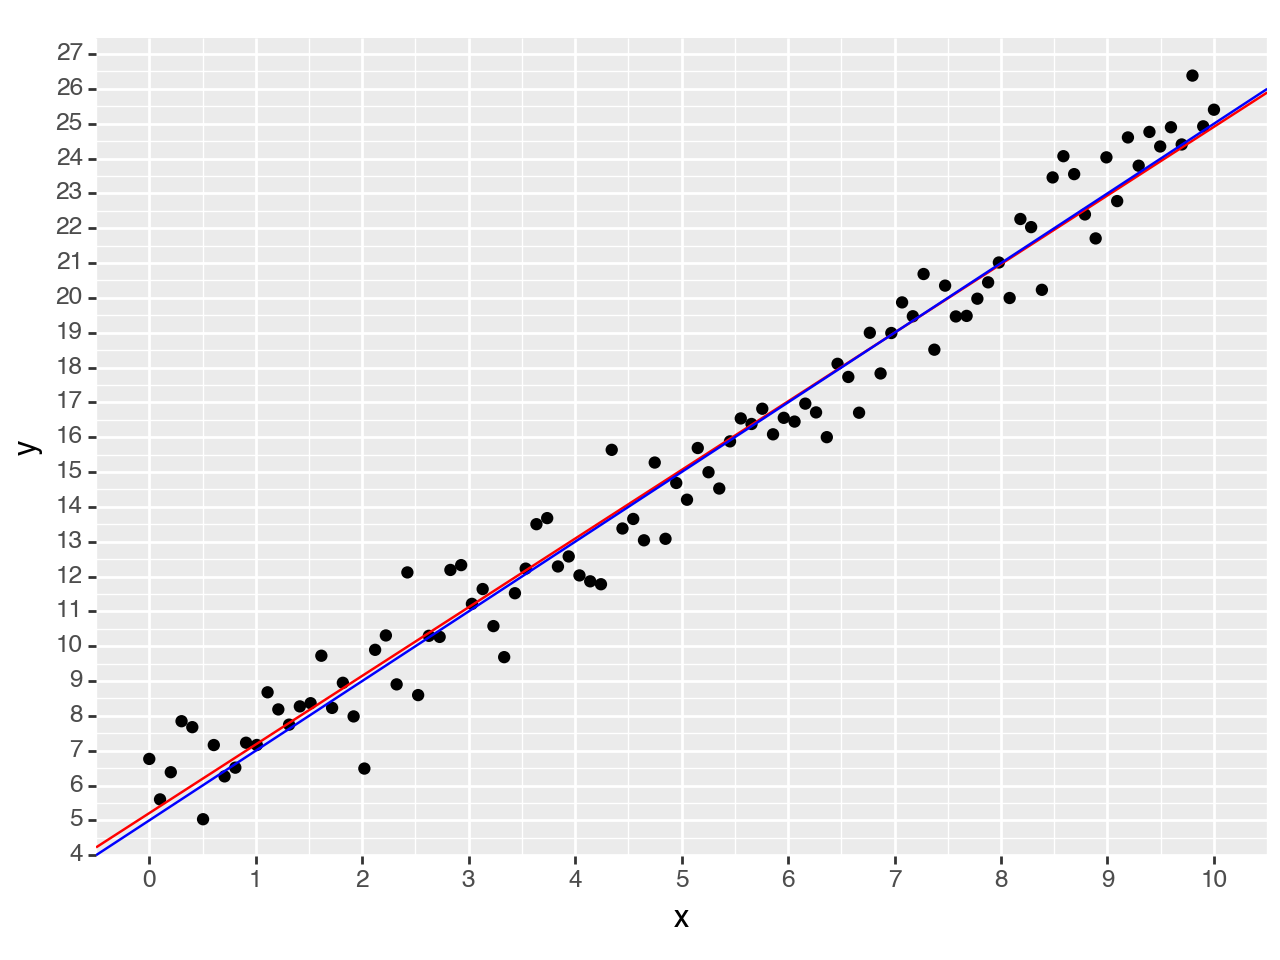

<Figure Size: (640 x 480)>

In [6]:
(
    ggplot(data, aes(x="x", y="y"))
    + geom_point()
    # regression line
    + geom_abline(intercept=fit.params.Intercept, slope=fit.params.x, color="red")
    # true linear function
    + geom_abline(intercept=intercept, slope=slope, color="blue")
    + scale_x_continuous(breaks=range(11))
    + scale_y_continuous(breaks=range(31))
)

## Exercise
For our exercises we will look at the "tips" dataset. It contains information about how much tip was given at restaurant visits.
Your task is to try to explain the amount of `tip` given by a linear model of the `total_bill` of the order.

In [ ]:
tips = sns.load_dataset("tips")
tips.head()

In [ ]:
#for the solution, see "lecture_solutions.txt"

### Always plot your data!
Don't just rely on the numbers.
<center><img src="images/always_plot_data.png" width="600" /></center>

## Understanding the Linear Regression Results

In [7]:
fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.970
Model:                            OLS   Adj. R-squared:                  0.970
Method:                 Least Squares   F-statistic:                     3208.
Date:                Thu, 15 Jun 2023   Prob (F-statistic):           1.09e-76
Time:                        16:14:39   Log-Likelihood:                -142.31
No. Observations:                 100   AIC:                             288.6
Df Residuals:                      98   BIC:                             293.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      5.2085      0.201     25.867      0.000       4.809       5.608
x              1.9703      0.035     56.636      0.000       1.901       2.039
==============================================================================
Omnibus:                        0.397   Durbin-Watson:                   1.841
Prob(Omnibus):                  0.820   Jarque-Bera (JB):                0.556
Skew:                          -0.036   Prob(JB):                        0.757
Kurtosis:                       2.642   Cond. No.                         11.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### p-value and effect size
The 2 values we care about most are the **effect size** and the **p-value**.<br>

The **effect size** quantifies the magnitude or strength of a relationship or difference between variables. We can check our effect size by looking at the `coef` $\mathbf{x}$, so the slope.<br>
Whether you interpret an effect size as sufficiently large to be reported depends on the units and the problem.

The **p-value** tells us whether the effect that we measured is statistically significant or if its more likely that it happened by chance.<br>
So assuming that there is no relationship between the variables in our data, then the p-value is the probability of seeing the effect that we observed or a greater one.<br> If that value is really low, then its really likely that there is actually some relationship between the variables and it was not just chance what we saw.

### explained variance
The explained variance $R^2$ describes how much variance got explained by the model.

$$R^2 = 1 - \frac{\mathrm{var}(\mathrm{residuals})}{\mathrm{var}(y)} $$

In [8]:
sns.jointplot(x = data.x, y = data.y, ylim=[0, 30]);
plt.savefig('images/seaborn_plot_1.png', dpi=300);
plt.close()

In [9]:
sns.jointplot(x = data.x, y = fit.resid, ylim=[-5, 30])
plt.savefig('images/seaborn_plot_2.png', dpi=300);
plt.close()

<table><tr>
<td> <img src="images/seaborn_plot_1.png" alt="Drawing" style="width:400px;"/> </td>
<td> <img src="images/seaborn_plot_2.png" alt="Drawing" style="width:400px;"/> </td>
</tr></table>

In [10]:
resid = fit.predict(data["x"]) - data["y"]
1 - (resid.var() / data.y.var())

0.9703537814132045

In [11]:
fit.rsquared

0.9703537814132045

<br>

# Hypothesis Testing
The goal of **hypothesis testing** is to find out if an effect that we observed in our sample is significant, so that we can draw conclusions about the population.<br>
A **significant effect** is an effect that *probably* didn't happen *by chance*.<br>
So how do we find out whether or not something *probably* happened **by chance**?

<center><img src="images/hypothesis_testing.png" width="700" /></center>

The idea is that we formulate a **null hypothesis** that assumes that there is **no effect**.<br>
Then we define a model based on the null-hypothesis that we can use to simulate datasets.<br>
Then we apply our test statistic to these datasets to check if we observe any effect.<br>
Now you might say, how can we observe any effect in these datasets if they were generated with a model that assumes no effect?<br>
The answer to this is that also a fair coin can show 10 times head.

So by checking the effect in these datasets, we get a distribution that shows us what effects we can expect with what probability.<br>
Finally we compare the effect in our original sample to this distribution so that we can know how likely it is.<br>
And **if its very unlikely**, then probably the effect we observed was **not just due to chance**. The value that quantifies this is the **p-value**.

#### BUT WHAT ABOUT
t-test, F-test, $\chi^2$ test, Kruskall-Wallis test, Mann-Whitney test, ...<br>
All of these test just refer to different methods that analytically compute or approximate the p-value.<br>
The problem is that these methods are usually complicated and inflexible. So for example we might not be able to simple switch out the test statistic to check for a different effect.<br>
These analytic methods were necessary at times when computation was slow and expensive, but nowadays this is not the case anymore.<br>
[There is still only one test](https://allendowney.blogspot.com/2016/06/there-is-still-only-one-test.html)

### So how do we simulate data based on the null hypothesis?

Depending on our data and scenario we can either do<br>
**direct simulation**<br>
**shuffling**<br>
or **bootstrapping**<br>

For a very comprehensive overview, you can check out Jake Vanderplas' talk at PyCon, titled [Statistics for Hackers](https://www.youtube.com/watch?v=Iq9DzN6mvYA).<br>

Now we will use statistical modeling / simulation to answer the question:

### Is there a difference in psychedelic effect between **brown** and **rainbow colored mushrooms**?

<table><tr>
<td> <img src="images/mushroom_brown.png" alt="Drawing" style="width:300px;"/> </td>
<td> <img src="images/mushroom_rainbow.png" alt="Drawing" style="width:300px;"/> </td>
</tr></table>

#### generate fake mushroom data

In [12]:
np.random.seed(0)

num_samples = 8*6
psy_effect_rainbow = 0.3 + 0.8*np.random.randn(num_samples)
psy_effect_brown = 2*np.random.randn(num_samples)

mushroom_df_brown = pd.DataFrame({"color": "brown", "psy_effect": psy_effect_brown})
mushroom_df_rainbow = pd.DataFrame({"color": "rainbow", "psy_effect": psy_effect_rainbow})

In [13]:
mushroom_df = pd.concat([mushroom_df_brown, mushroom_df_rainbow])
mushroom_df = mushroom_df.sample(frac=1).reset_index(drop=True)
mushroom_df.to_csv("data/mushrooms.csv", index=False)

### the data

In [14]:
df = pd.read_csv("data/mushrooms.csv")
df.head()

,color,psy_effect
0,rainbow,0.058158
1,brown,-1.344921
2,brown,-1.626293
3,rainbow,-1.284637
4,brown,2.976504


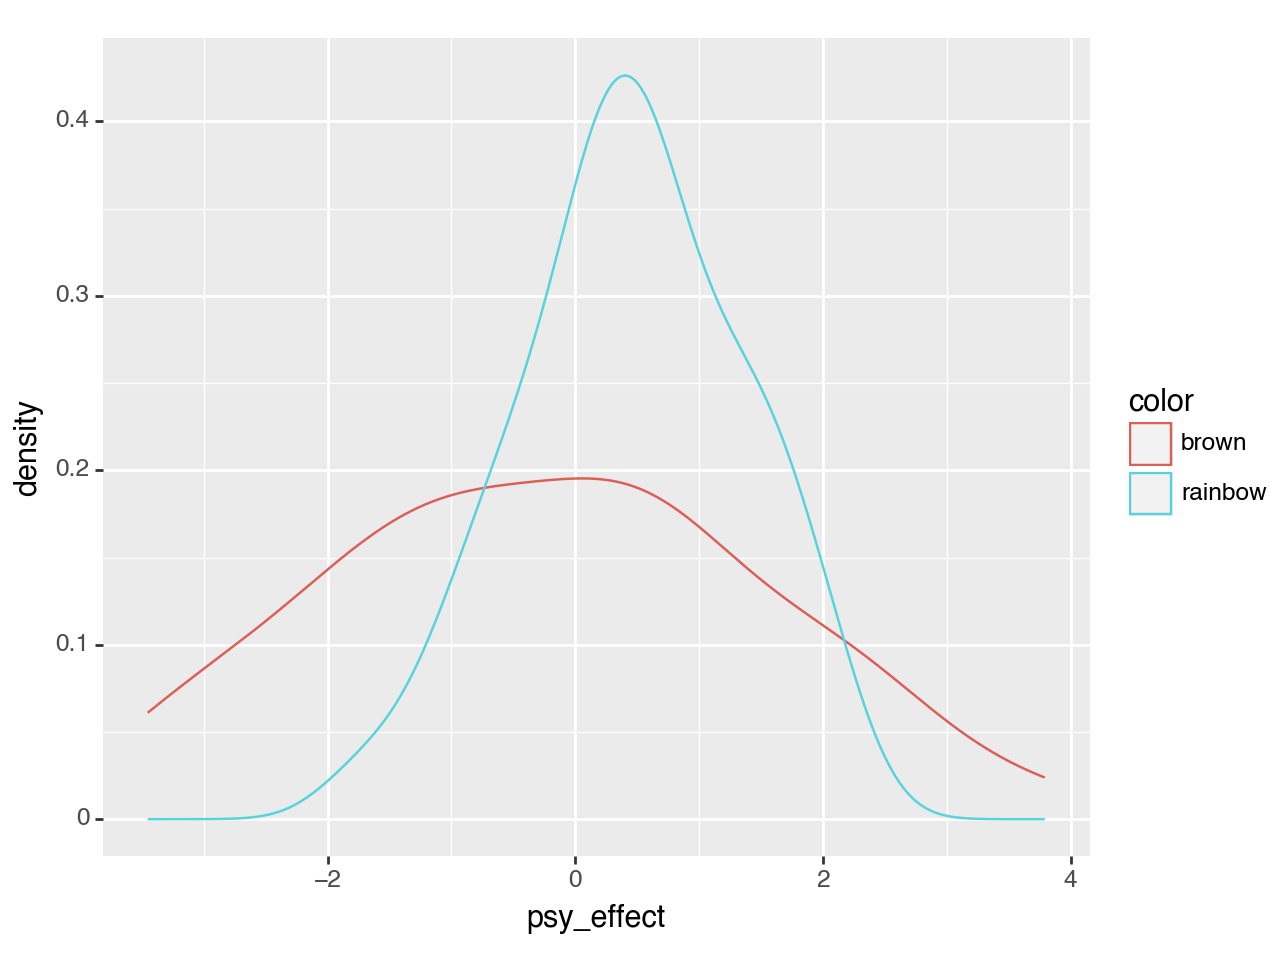

<Figure Size: (640 x 480)>

In [15]:
(ggplot(df, aes(x='psy_effect', color="color"))
 + geom_density()
)

### Steps
#### formulate null-hypothesis
<blockquote style="font-size: 15px; text-align: center;">
    <p>"There is no difference in psychedelic effect between the brown and rainbow mushroom."</p>
</blockquote>

#### define model to generate data based on the null-hypothesis
We model the null-hypothesis by shuffling the color labels of the mushrooms repeatedly and applying our test statistic.<br>
Because if the null-hypothesis is true, then the colors shouldn't matter, so switching them should give us a similar test statistic result.

In [16]:
# we shuffle the color column
# and then calculate the mean for both color groups and calculate their differnece
def shuffle_and_test(data):
    df = data.copy()
    df["color"] =  np.random.permutation(df["color"].values)
    means = df.groupby("color").mean().values
    return math.dist(means[0], means[1])

In [17]:
diff = shuffle_and_test(df)
diff

0.13593809995701467

#### generate samples and apply test statistic


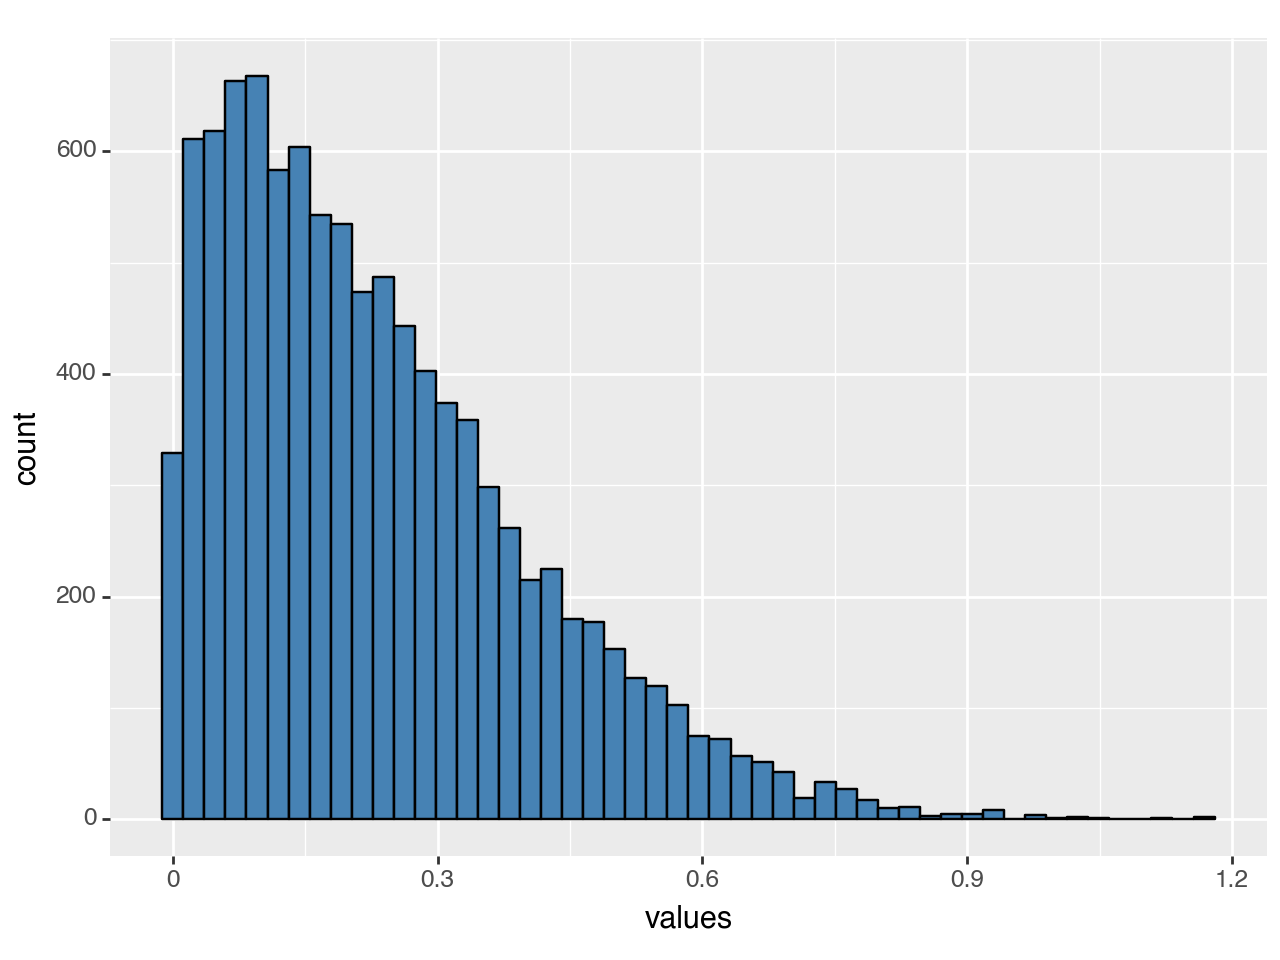

<Figure Size: (640 x 480)>

In [18]:
num_samples = 10000

sampled_diff = np.array([shuffle_and_test(df) for _ in range(num_samples)])
sampled_diff_df = pd.DataFrame({'values': sampled_diff})

(ggplot(sampled_diff_df, aes(x='values'))
    + geom_histogram(bins=50, fill="steelblue", color="#000000"))


#### The sampling distribution
The distribution that we see here is an approximation of the **sampling distribution**.<br>
The **sampling distribution** is the distribution of a test statistic applied to a number of samples from the population.<br>
It tells us about the **Variability** of our test statistic<br>

By approximating it, we estimate what values we we would expect if we were to repeat the experiment multiple times.<br>
When we now compare the test statistic value of our original sample with this distribution we get to know an approximation of how likely it would be to observe such a value.<br>

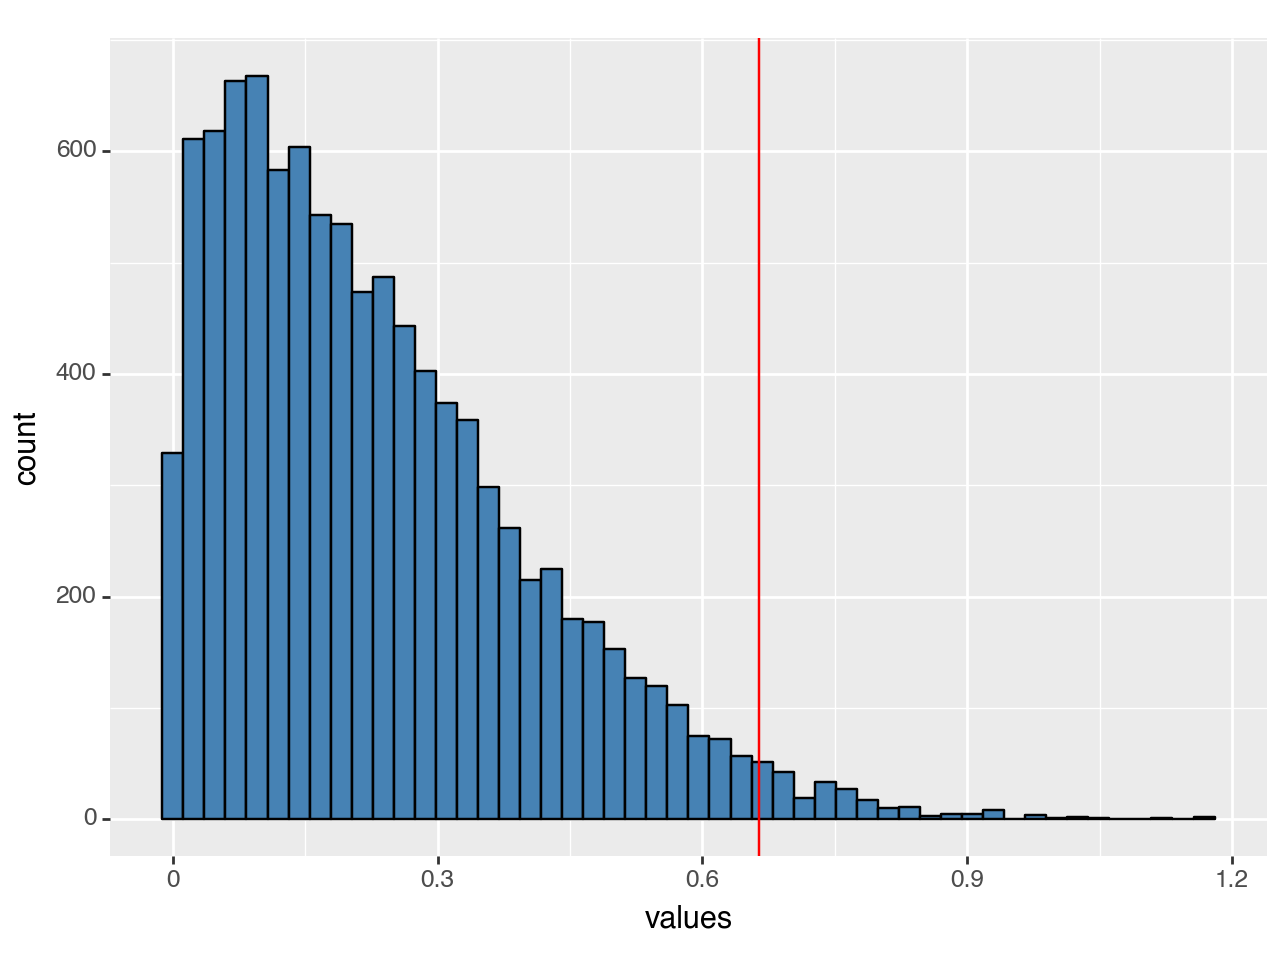

<Figure Size: (640 x 480)>

In [19]:
# calculate test statistic of original sample
means = df.groupby("color").mean().values
mushroom_diff_value = math.dist(means[0], means[1])

(ggplot(sampled_diff_df, aes(x='values'))
    + geom_histogram(bins=50, fill="steelblue", color="#000000")
    + geom_vline(
        aes(xintercept=mushroom_diff_value), color="#FF0000")
)

#### calculate p-value
To get the probability of observing an equal or more extreme value compared to our original `mushroom_diff_value`, we just divide the number of these values by the total number of values.

In [20]:
len(sampled_diff[sampled_diff >= mushroom_diff_value]) / num_samples

0.0223

Based on this p-value we can say that:<br>
**There is probably a difference in psychedelic effect between the brown and rainbow mushroom.**


<br>

## Another example - checking the significance of our linear regression
This time with the help of [confidence intervals instead of p-values](https://statisticsbyjim.com/hypothesis-testing/hypothesis-tests-confidence-intervals-levels/).

In [21]:
fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.970
Model:                            OLS   Adj. R-squared:                  0.970
Method:                 Least Squares   F-statistic:                     3208.
Date:                Thu, 15 Jun 2023   Prob (F-statistic):           1.09e-76
Time:                        17:24:00   Log-Likelihood:                -142.31
No. Observations:                 100   AIC:                             288.6
Df Residuals:                      98   BIC:                             293.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      5.2085      0.201     25.867      0.000       4.809       5.608
x              1.9703      0.035     56.636      0.000       1.901       2.039
==============================================================================
Omnibus:                        0.397   Durbin-Watson:                   1.841
Prob(Omnibus):                  0.820   Jarque-Bera (JB):                0.556
Skew:                          -0.036   Prob(JB):                        0.757
Kurtosis:                       2.642   Cond. No.                         11.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

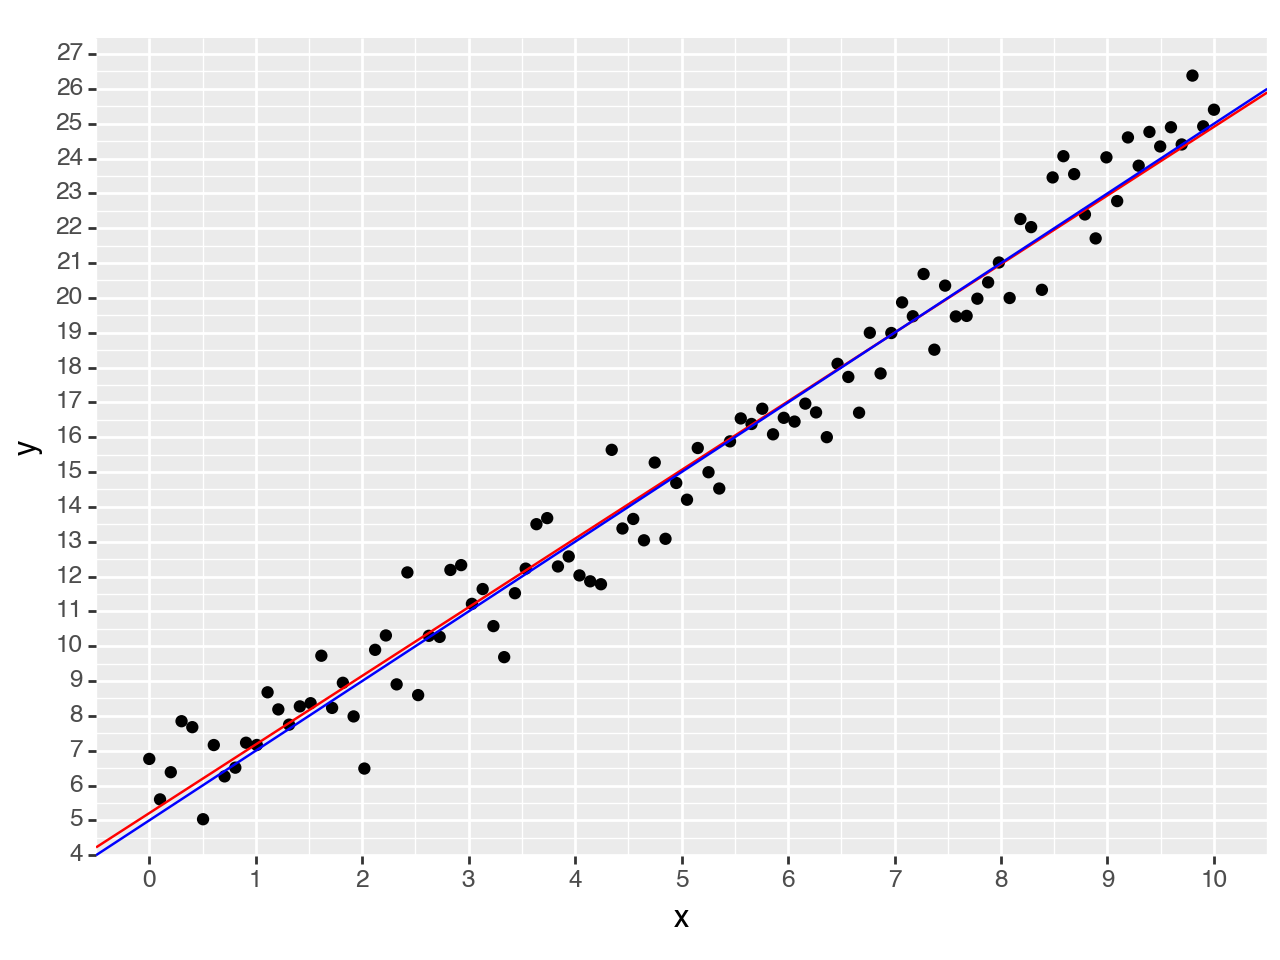

<Figure Size: (640 x 480)>

In [22]:
(
    ggplot(data, aes(x="x", y="y"))
    + geom_point()
    # regression line
    + geom_abline(intercept=fit.params.Intercept, slope=fit.params.x, color="red")
    # true linear function
    + geom_abline(intercept=intercept, slope=slope, color="blue")
    + scale_x_continuous(breaks=range(11))
    + scale_y_continuous(breaks=range(31))
)

#### with the help of **Bootstrapping**
Drawing samples from an analytic distribution is of course not an option for real experiments. In reality we are most of the time limited to a single sample from the population.<br>
A technique called bootstrapping still allows us to build a model of the population from a single sample. We can simply generate new samples by drawing from our real sample with replacement.

In [ ]:
def get_sampling_distribution(formula, param, data, n_samples=1000):
    samples = np.zeros(n_samples)
    for i in range(n_samples):
        resampled = data.sample(len(data), replace=True)
        fit = smf.ols(formula, resampled).fit()
        samples[i] = fit.params[param]
    return samples


sampling_distribution_of_slopes = get_sampling_distribution("y ~ x", "x", data)

In [ ]:
(
    qplot(sampling_distribution_of_slopes, bins=25,)
    + geom_vline(aes(xintercept=fit.params["x"]), color="red", size=2)
    + labs(x="slopes", title="sampling distribution")
)

## Confidence intervals
Confidence intervals are a complementary way to quantify uncertainty due to sampling error.<br>
For example, a 95%-confidence interval tells us that if we repeat the experiment, our computed parameter will fall into the confidence interval in 95% of the cases.<br> Confidence intervals can easily be computed by taking the left and the right percentile of the sampling distribution of the appropriate sizes.

In [ ]:
def confidence_interval(sampling_distribution, size=95):
    sampling_distribution = np.asarray(sampling_distribution)
    left = (100 - size) / 2
    right = size + left
    return np.percentile(sampling_distribution, [left, right])


In [ ]:
confidence_interval(sampling_distribution_of_slopes, 95)

**The 95% confidence interval does not include 0, so we can reject the hypothesis that there is no relationship between our variables.**

<br>

# Assumptions
**Note: Even though not all assumptions are satisfied, linear regression might still make sense and can give us some insights about our data**<br> 
When we do linear regression, we make a set of assumptions that should be satisfied for the regression results to be valid. They can be convenient remembered with the word **LINE**.

1. Linearity of response
1. Independence of residuals
1. Normality of residuals 
1. Equal variance

All these assumption naturally follow from the structure of the linear model

\begin{equation}
\mathbf{y} = \mathbf{X}\mathbf{\beta} + \mathbf{\epsilon}
\end{equation}

\begin{equation}
\epsilon \sim \mathcal{N}(0, \sigma^2)
\end{equation}

which implies that after removing the data explained by the linear model, only white noise should be left.

We look at bunch of visual checks to verify these assumptions.

## Linearity of response
A plot that helps to check for many assumtions is the residual plot. We simply plot the residuals against the predictor variable and draw a horizontal line at zero to indicate our expected mean.

In [ ]:
data["residuals"] = fit.resid
(
    ggplot(data, aes(x="x", y="residuals"))
    + geom_point()
    + geom_hline(aes(yintercept=0), linetype="--", color="gray")
)

The residual plot of our data indicates a linear response. A residual plot of a non-linear response would look more like the following.

In [ ]:
data_cubed = data.copy()
data_cubed["y"] = data_cubed["y"] ** 3
(
    ggplot(data_cubed, aes(x="x", y="y"))
    + geom_point()
    + geom_smooth(method="lm", se=False)
)

In [ ]:
fit_cubed = smf.ols("y ~ x", data_cubed).fit()
fit_cubed.summary()

In [ ]:
data_cubed["residuals"] = fit_cubed.resid
(
    ggplot(data_cubed, aes("x", "residuals"))
    + geom_point()
    + geom_hline(aes(yintercept=0), linetype="--", color="gray")
)

## Independence of residuals
Means that there is no relation between the current and previous residuals. Again our data shows no sign of dependent residuals. Dependent residuals can be often found in time series data.

In [ ]:
data_sin = data.copy()
data_sin["y"] = np.sin(x * 0.5)
(
    ggplot(data_sin, aes(x="x", y="y"))
    + geom_point()
    + geom_smooth(method="lm", se=False)
)

In [ ]:
fit_sin = smf.ols("y ~ x", data_sin).fit()
fit_sin.summary()

In [ ]:
data_sin["residuals"] = fit_sin.resid
(
    ggplot(data_sin, aes("x", "residuals"))
    + geom_point()
    + geom_hline(aes(yintercept=0), linetype="--", color="gray")
)

## Normality of residuals
To check that our residuals actually follow a normal distribution, we can do two things. 

Firstly, we can make a histogram of the residuals and put the theoretical normal distribution on top. This way we can check if the two distributions approximately match up.

In [ ]:
from scipy import stats

(ggplot(data, aes(x="residuals"))
 + geom_histogram(aes(y="stat(density)"), bins=20)
 + geom_line(
     aes(y=stats.norm.pdf(data["residuals"], loc=0, scale=data["residuals"].std())),
     color="red",
     size=2,
 )
)

A more precise way of checking whether the empirical distribution of our residuals follows a normal distribution is a so called *qqplot*. A qqplot (quantile-quantile plot) plots the quantiles of the empirical distribution against the qunatiles of the theoretical distribution. The plot is contructed in a way that each original data point is shown and paired up with its theoretical quantile. If the two distributions match, the points should form a **straight line**. For more information about qqplot see https://seankross.com/2016/02/29/A-Q-Q-Plot-Dissection-Kit.html. 

In [ ]:
sm.qqplot(fit.resid, line="45", scale=np.std(fit.resid));

In [ ]:
sm.qqplot(fit_cubed.resid, line="45", scale=np.std(fit_cubed.resid));

## Equal variance
Equal variance, also know by the fancy term homoscedasticity, can be evaluated based on the residualplot. Let's look at an example of unequal variance (heteroscedasticity), so you know what to look out for.

In [ ]:
slope = 2
x = np.linspace(0, 10, 100)
y = intercept + x * slope
y[:25] += np.random.normal(scale=1, size=25)
y[25:50] += np.random.normal(scale=2, size=25)
y[50:75] += np.random.normal(scale=4, size=25)
y[75:] += np.random.normal(scale=8, size=25)
data_var = pd.DataFrame({"x": x, "y": y})

(
    ggplot(data_var, aes(x="x", y="y"))
    + geom_point()
    + geom_smooth(method="lm", se=False)
)

In [ ]:
fit_var = smf.ols("y ~ x", data_var).fit()
data_var["residuals"] = fit_var.resid
(
    ggplot(data_var, aes("x", "residuals"))
    + geom_point()
    + geom_hline(aes(yintercept=0), linetype="--", color="gray")
)

## Exercise
Check the assumptions of linear regression on the `tips` dataset. Was it right to use linear regression on the dataset?

In [ ]:
#for the solution, see "lecture_solutions.txt"

# Sources
[Jake Vanderplas - Statistics for Hackers - PyCon 2016](https://www.youtube.com/watch?v=Iq9DzN6mvYA)<br>
[There is only one test! ](https://allendowney.blogspot.com/2011/05/there-is-only-one-test.html)<br>
[Same Stats, Different Graphs: Generating Datasets with Varied Appearance and Identical Statistics through Simulated Annealing ](https://qvintest.blogspot.com/2017/05/same-stats-different-graphs-generating.html)